<a href="https://colab.research.google.com/github/Abdullahali77/NTI_ML/blob/main/Penguin_DecisionTree_Abdullah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('penguins_size.csv')

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


In [11]:
df.shape

(344, 7)

In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [18]:
df.species.value_counts()

,count
species,
Adelie,146
Gentoo,120
Chinstrap,68


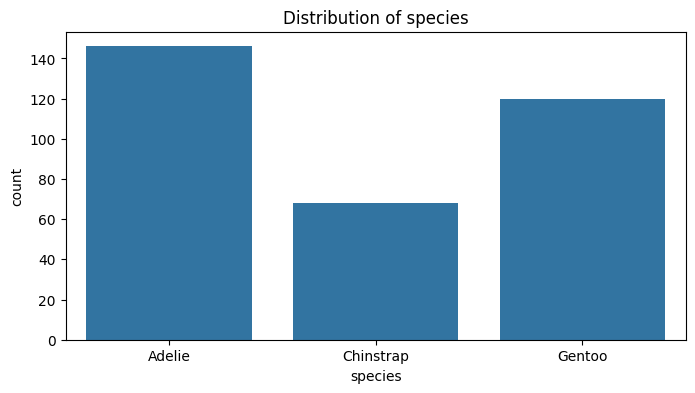

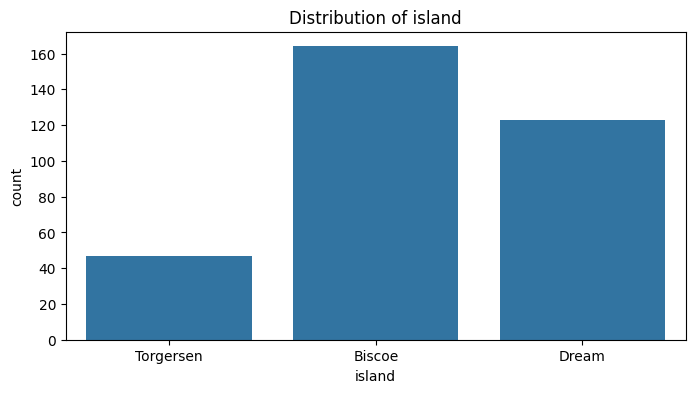

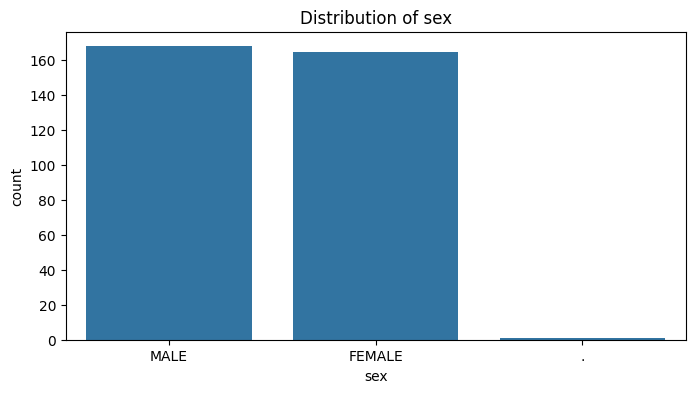

In [21]:
for col in ['species', 'island', 'sex']:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

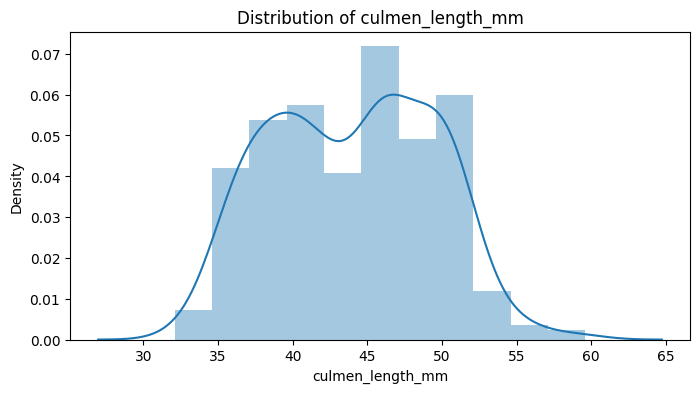

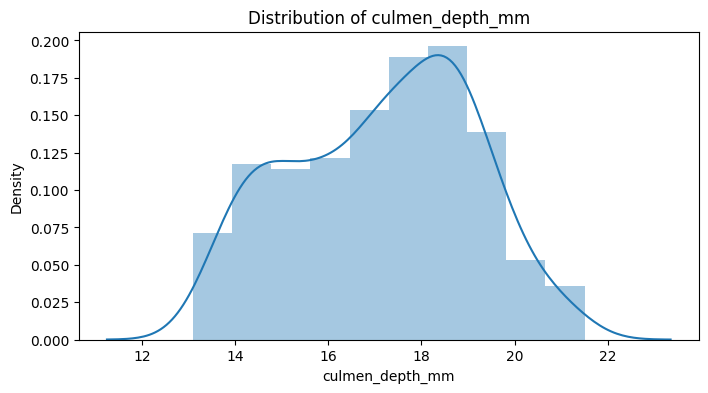

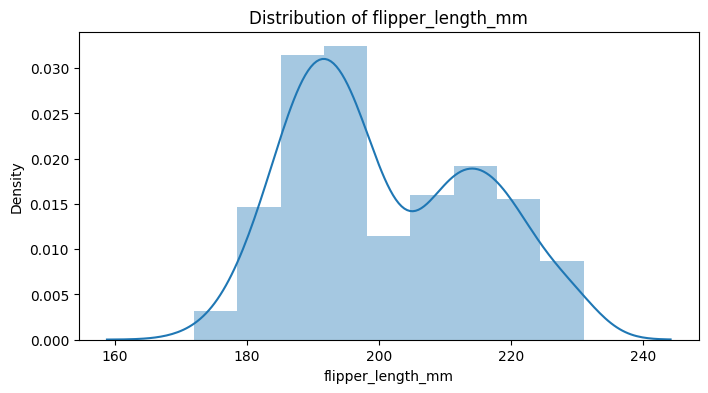

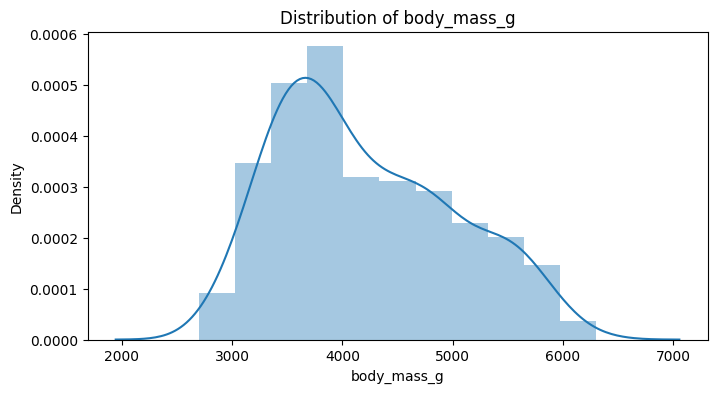

In [22]:
# numerical ditrubutions
for col in ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']:
  plt.figure(figsize=(8,4))
  sns.distplot(df[col])
  plt.title(f'Distribution of {col}')
  plt.show()

In [27]:
# الموديل جاب ايرور من غير انكود
# ابقا اسال الدكتور
# Encode
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df['island'] = le.fit_transform(df['island'])
df['sex'] = le.fit_transform(df['sex'])

In [28]:
from sklearn.model_selection import train_test_split
X = df.drop('species', axis=1)
y = df['species']

X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.25, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(233, 6) (75, 6) (26, 6)


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import (classification_report,accuracy_score,roc_auc_score, confusion_matrix)

In [36]:
# Decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        27

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.98        75
weighted avg       0.99      0.99      0.99        75



In [33]:
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         7

    accuracy                           0.96        26
   macro avg       0.93      0.98      0.95        26
weighted avg       0.97      0.96      0.96        26



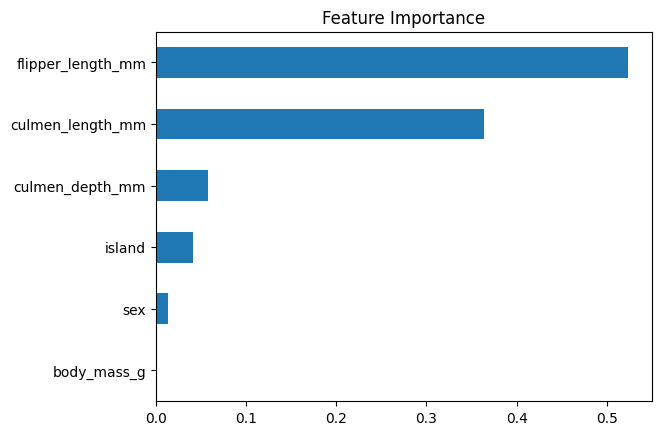

In [56]:
pd.Series(dt.feature_importances_,
          index=X.columns).sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()

**ChatGPT**:
Since your target (species) has 3 classes we cant use normal roc_auc_score
use ovr or ovo

To handle multi-class classification, you have two options:

🔸 1. OvR (One-vs-Rest):
Treat each class as the "positive class" and the rest as "negative".

Compute a separate AUC for each class and average the result.

✅ Most commonly used for multi-class AUC.

🔸 2. OvO (One-vs-One):
Compute AUC for every pair of classes.

More computationally expensive (especially for many classes).

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Binarize the labels (creates 3 columns for 3 classes)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)  # shape: (n_samples, n_classes)

# Get predicted probabilities for all classes
y_proba = dt.predict_proba(X_test)  # shape: (n_samples, n_classes)

# Calculate AUC-ROC for each class vs rest
auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr')
print(f"OvR AUC-ROC: {auc:.4f}")

OvR AUC-ROC: 1.0000


In [45]:
auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovo')
print(f"OvO AUC-ROC: {auc:.4f}")

OvO AUC-ROC: 1.0000


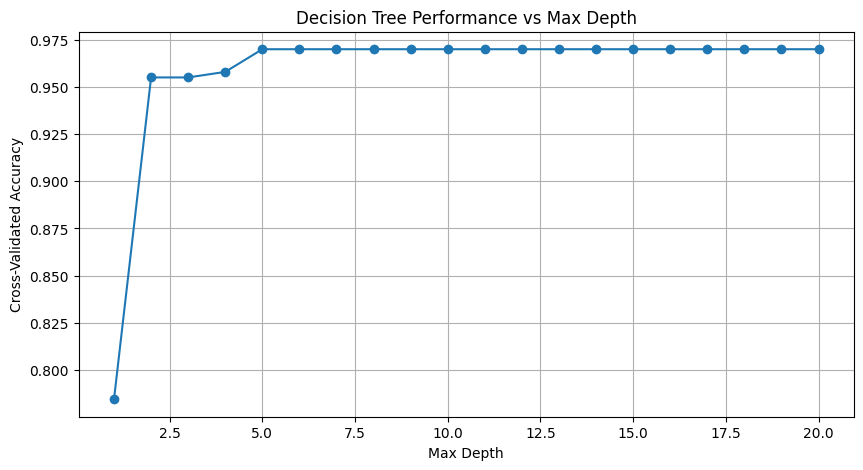

Optimal max_depth: 5


In [48]:
# Cross validation
model = DecisionTreeClassifier(random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate max_depth from 1 to 20
max_depths = range(1, 21)
cv_scores = []

for depth in max_depths:
    model.set_params(max_depth=depth)
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot CV results
plt.figure(figsize=(10,5))
plt.plot(max_depths, cv_scores, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Decision Tree Performance vs Max Depth')
plt.grid()
plt.show()

best_depth = max_depths[np.argmax(cv_scores)]
print(f"Optimal max_depth: {best_depth}")

In [51]:
final_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_model.fit(X, y)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [52]:
# Cross-validated metrics
metrics = {
    'Accuracy': cross_val_score(final_model, X, y, cv=kf, scoring='accuracy').mean(),
    'Precision': cross_val_score(final_model, X, y, cv=kf, scoring='precision_macro').mean(),
    'Recall': cross_val_score(final_model, X, y, cv=kf, scoring='recall_macro').mean(),
    'F1': cross_val_score(final_model, X, y, cv=kf, scoring='f1_macro').mean(),
    'ROC AUC': cross_val_score(final_model, X, y, cv=kf, scoring='roc_auc_ovo').mean()
}

In [53]:
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Accuracy: 0.9701
Precision: 0.9703
Recall: 0.9678
F1: 0.9672
ROC AUC: 0.9758


In [57]:
# Try Logisitc regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        27

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.98        75
weighted avg       0.99      0.99      0.99        75



In [60]:
print(roc_auc_score(y_val,lr.predict_proba(X_val),multi_class='ovr'))

0.9993705598992896


In [61]:
# Try Knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        34
           1       0.64      0.50      0.56        14
           2       0.87      0.96      0.91        27

    accuracy                           0.80        75
   macro avg       0.77      0.75      0.76        75
weighted avg       0.79      0.80      0.79        75



In [62]:
print(roc_auc_score(y_val,knn.predict_proba(X_val),multi_class='ovr'))

0.8676181946213801
